<a href="https://colab.research.google.com/github/SmithTheGreat/Romit-Ghosh-MIT-Maker-Portfolio-SRC/blob/main/Handwritten_Digit_Recognition_using_mnist_training_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import cv2
from keras.datasets import mnist

In [2]:
from google.colab import files

In [3]:
(train_X, train_y), (test_X, test_Y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model= Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(11,activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,971 (410.04 KB)

 Trainable params: 104,971 (410.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(train_X,train_y,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4259 - loss: 3.9873 - val_accuracy: 0.7363 - val_loss: 0.8976
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7632 - loss: 0.8206 - val_accuracy: 0.9062 - val_loss: 0.5164
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9002 - loss: 0.4340 - val_accuracy: 0.9362 - val_loss: 0.3113
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9369 - loss: 0.2661 - val_accuracy: 0.9381 - val_loss: 0.2828
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9494 - loss: 0.2049 - val_accuracy: 0.9550 - val_loss: 0.1883
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9594 - loss: 0.1680 - val_accuracy: 0.9537 - val_loss: 0.2011
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9657 - loss: 0.1341 - val_accuracy: 0.9577 - val_loss: 0.1828
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9712 - loss: 0.1087 - 

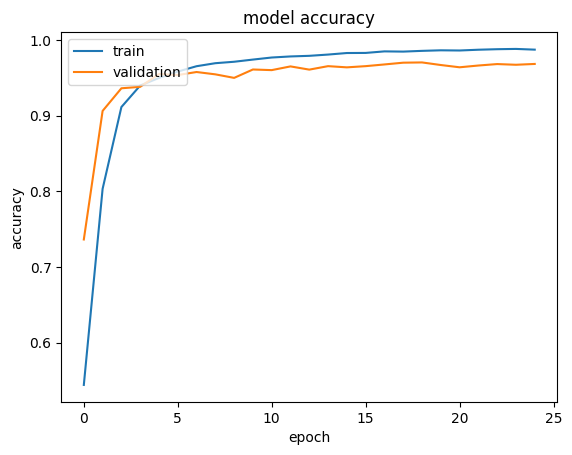

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

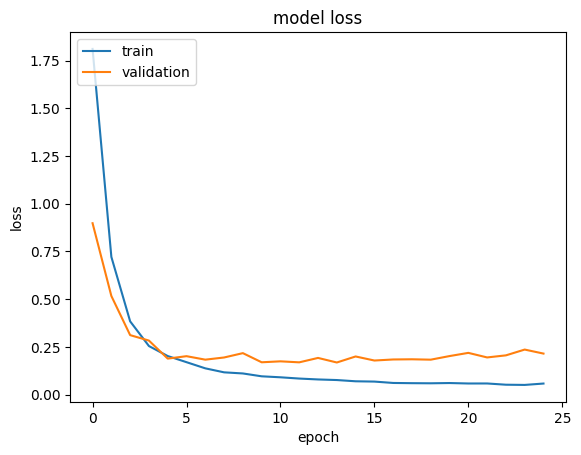

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
custom_img = files.upload()
custom_img = cv2.imread('four.jpeg', cv2.IMREAD_GRAYSCALE)

custom_img = cv2.resize(custom_img, (28, 28))

custom_img = custom_img / 255.0

custom_img_flat = custom_img.reshape(1, 28, 28, 1).astype(np.float32)

prediction = model.predict(custom_img_flat)
print(prediction)
print(np.argmax(prediction))

Saving four.jpeg to four.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[7.1438504e-03 1.1119136e-02 3.3754394e-03 6.9322134e-03 9.0692049e-01
  5.9519964e-03 6.7748330e-03 6.5868148e-03 1.7577631e-02 2.7616911e-02
  8.8904898e-07]]
4
